In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [8]:
path=r"C:\Users\Akshat\Downloads\DBSCAN_Data.csv"
df=pd.read_csv(path)

In [9]:
df

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


In [10]:
X=df.iloc[:,0]
Y=df.iloc[:,1]

Text(0, 0.5, 'Height')

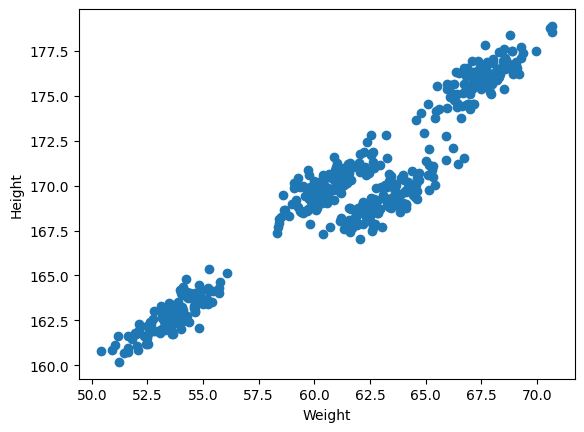

In [11]:
plt.scatter(X,Y)
plt.xlabel('Weight')
plt.ylabel('Height')

In [12]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def Distance(P1, P2):
    ### Enter Code to find distance between 2 points
    d=np.sqrt((P1.x-P2.x)**2+(P1.y-P2.y)**2)
    return d

def Mean(AP):
    ### Write code to find centroid of an group of points
    if len(AP) == 0:
        return Point(0, 0)
    x=np.mean([p.x for p in AP])
    y=np.mean([p.y for p in AP])
    return Point(x,y)

def MinPoint(P, AP):
    ### To find the group a point P belongs to given centroids AP
    i=np.argmin([Distance(centroid, P) for centroid in AP])
    return AP[i]

def equality(A1, A2):
    ### Check if A1 and A2 arrays are same or not(same values)
    a=(A1==A2)
    flag=1
    for e in a:
        if(e==False):
            flag-=1
            break
    return flag

In [ ]:
"""
Below is a method to perform Density Based Spatial Clustering of Applications with Noise.
"""
def dbscan(X,Y,epsilon,minPoints):
    n=len(X)
    points=[]
    pointdict={}
    for i in range(n):
        points.append(Point(X[i],Y[i]))
    
    for point in points:
        #Determine number of points within epsilon radius
        points_within_eps=[]

        for p_1 in points:
            if(Distance(point,p_1)<epsilon):
                points_within_eps.append(p_1)

        pointdict[point]=points_within_eps

        core_pts=[]
        for point in points:
            if(len(pointdict[point])>minPoints):
                core_pts.append(point)

In [72]:
def region_query(points,point,eps):
    nbs=[]
    for i in range(len(points)):
        distance=Distance(points[point],points[i])
        if(distance<=eps):
            nbs.append(i)
    return nbs

In [79]:
def grow_cluster(points,p,C,eps,neighbours,MinPts,clusters):
    clusters[p]=C
    i=0

    while i<len(neighbours):
        Pn=neighbours[i]
        if(clusters[Pn]==-1):
            clusters[Pn]=C
        elif(clusters[Pn]==0):
            clusters[Pn]=C
            nbs=region_query(points,Pn,eps)
            if len(nbs)>=MinPts:
                neighbours.extend(nbs)
        i+=1

In [80]:
def dbscan(X,Y,eps,MinPts):
    C=0
    clusters=[0]*len(X)
    points = [Point(X[i], Y[i]) for i in range(len(X))]
    
    for p in range(len(points)):
        if not (clusters[p]==0):
            continue
        neighbours=region_query(points,p,eps)
        if(len(neighbours)<MinPts):
            clusters[p]=-1
        else:
            C+=1
            grow_cluster(points,p,C,eps,neighbours,MinPts,clusters)
        
    return clusters

In [132]:
labels=dbscan(X,Y,0.6,7)
lb=set(labels)
lb

{-1, 1, 2, 3, 4}

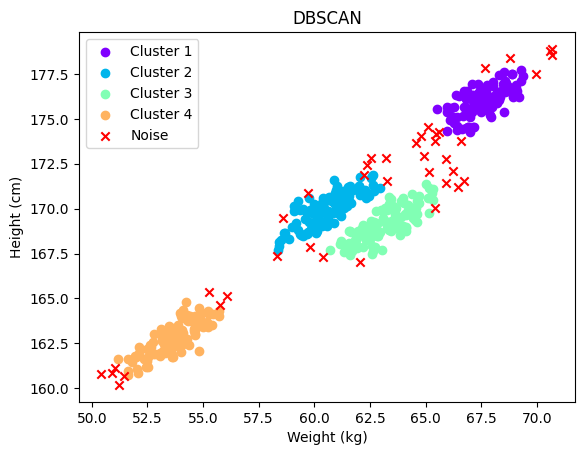

In [137]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(lb)))
for (cluster,color) in zip(lb,colors):
    if cluster==-1:
        plt.scatter([X[i] for i in range(len(X)) if labels[i]==cluster],
                    [Y[i] for i in range(len(Y)) if labels[i]==cluster],
                    c=[color], marker='x', label='Noise')
    else:
        plt.scatter([X[i] for i in range(len(X)) if labels[i]==cluster],
                    [Y[i] for i in range(len(X)) if labels[i]==cluster],
                    c=[color], marker='o', label=f'Cluster {cluster}')
        
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('DBSCAN')
plt.legend()
plt.show()